In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.drop(['PassengerId', 'Name','Ticket','Cabin','Embarked'], axis = 1, inplace = True)

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.dropna(subset=['Age'], inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  674 non-null    int64  
 1   Pclass    674 non-null    int64  
 2   Sex       674 non-null    object 
 3   Age       674 non-null    float64
 4   SibSp     674 non-null    int64  
 5   Parch     674 non-null    int64  
 6   Fare      674 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 42.1+ KB


Text(0.5, 1.0, 'Titanic Survival Count')

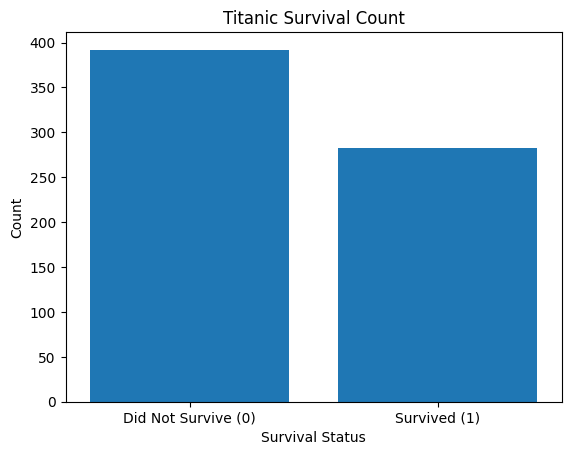

In [25]:
survived = df['Survived'].value_counts()

fix, ax = plt.subplots()
ax.bar(survived.index, survived.values, tick_label=survived.index,)

ax.set_xlim(-0.5, 1.5)

ax.set_xticks(survived.index)
ax.set_xticklabels(['Did Not Survive (0)', 'Survived (1)'])


ax.set_xlabel("Survival Status")
ax.set_ylabel("Count")
ax.set_title("Titanic Survival Count")


Text(0.5, 1.0, 'Ticket Class Count')

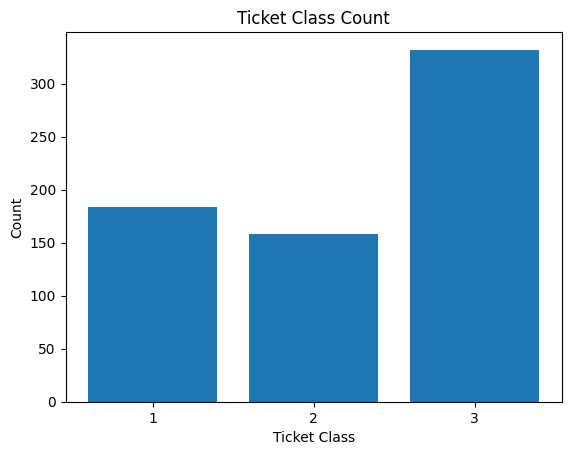

In [29]:
pclass = df['Pclass'].value_counts()

fix, ax = plt.subplots()
ax.bar(pclass.index, pclass.values, tick_label=pclass.index,)

ax.set_xlabel("Ticket Class")
ax.set_ylabel("Count")
ax.set_title("Ticket Class Count")



Text(0.5, 1.0, 'Sex Count')

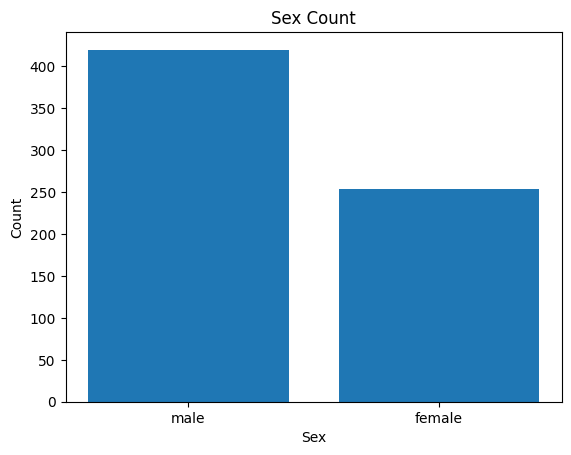

In [30]:
sex = df['Sex'].value_counts()

fix, ax = plt.subplots()
ax.bar(sex.index, sex.values, tick_label=sex.index,)

ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.set_title("Sex Count")

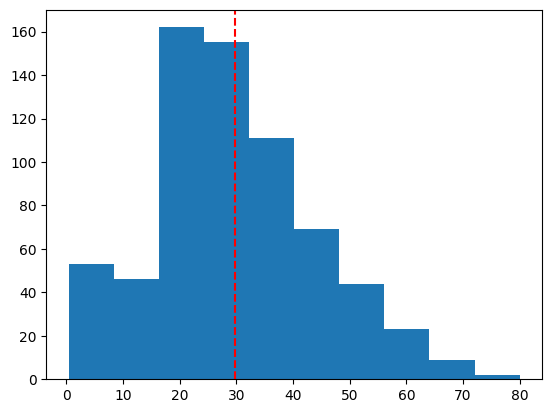

In [34]:
fix, ax = plt.subplots()

ax.hist(df["Age"])
ax.axvline(np.mean(df["Age"]), color='red', linestyle='--')

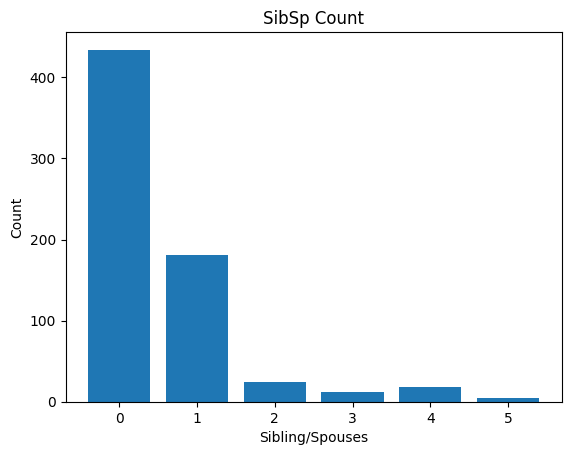

In [38]:
sibsp = df['SibSp'].value_counts()

fix, ax = plt.subplots()
ax.bar(sibsp.index, sibsp.values, tick_label=sibsp.index,)


ax.set_xlabel("Sibling/Spouses")
ax.set_ylabel("Count")
ax.set_title("SibSp Count")


Text(0.5, 1.0, 'Parch Count')

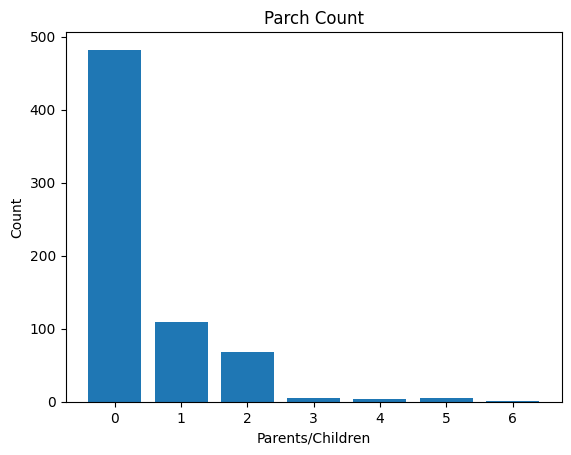

In [40]:
parch = df['Parch'].value_counts()

fix, ax = plt.subplots()
ax.bar(parch.index, parch.values, tick_label=parch.index,)


ax.set_xlabel("Parents/Children")
ax.set_ylabel("Count")
ax.set_title("Parch Count")

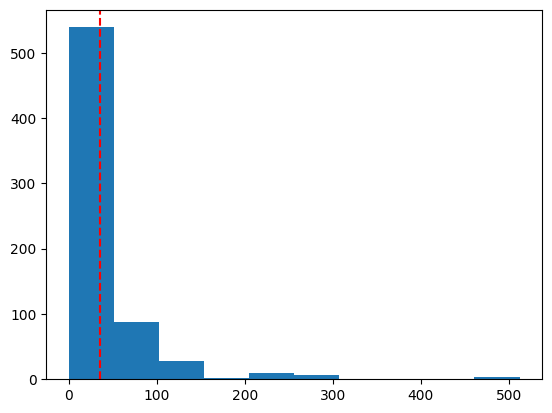

In [41]:
fix, ax = plt.subplots()

ax.hist(df["Fare"])
ax.axvline(np.mean(df["Fare"]), color='red', linestyle='--')

In [46]:
df.query("Fare >= 500")[["Pclass", "Fare"]]

,Pclass,Fare
258,1,512.3292
679,1,512.3292
737,1,512.3292


/tmp/ipython-input-3321257841.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(x=[group.values for name, group in grouped],


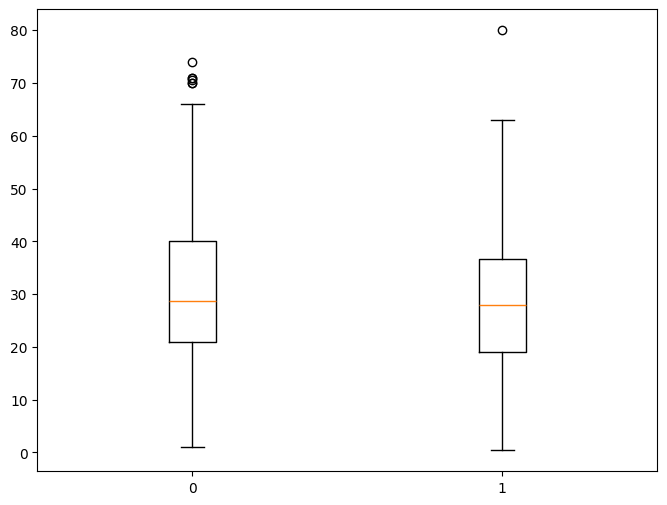

In [54]:
grouped = df.groupby("Survived")["Age"]

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8,6))

# Create the plot
ax.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys())

# Display it
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

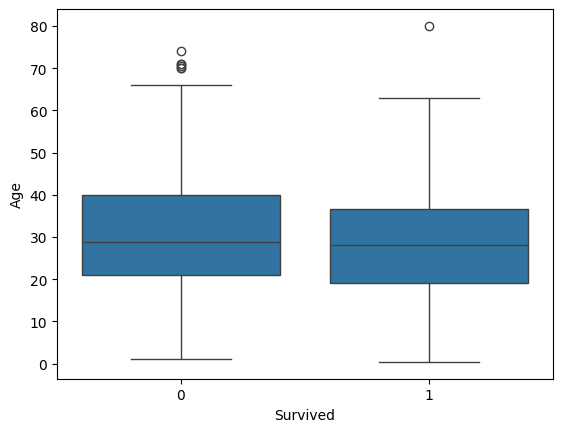

In [56]:
sns.boxplot(x = "Survived", y = "Age", data = df)

/tmp/ipython-input-356022122.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(x=[group.values for name, group in grouped],


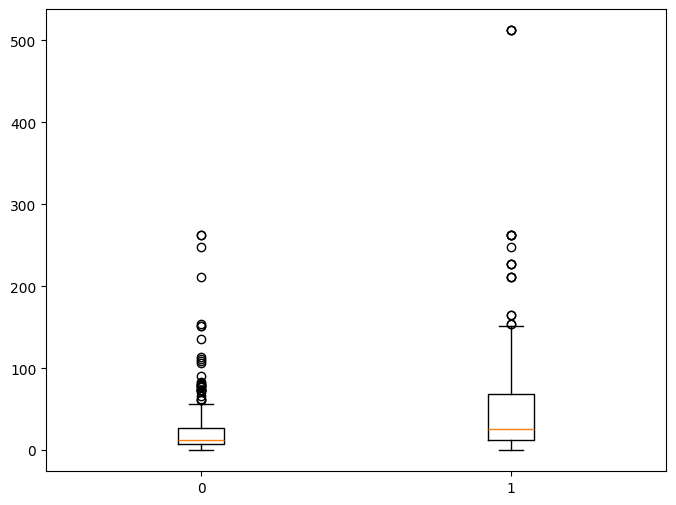

In [55]:
grouped = df.groupby("Survived")["Fare"]

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8,6))

# Create the plot
ax.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys())

# Display it
plt.show()

<Axes: xlabel='Survived', ylabel='Fare'>

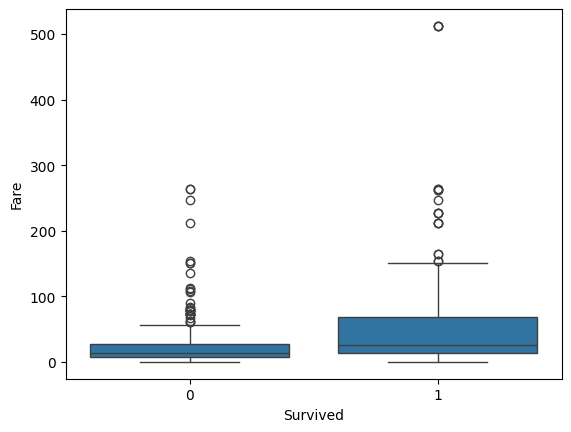

In [57]:
sns.boxplot(x = "Survived", y = "Fare", data = df)

<Axes: xlabel='Survived'>

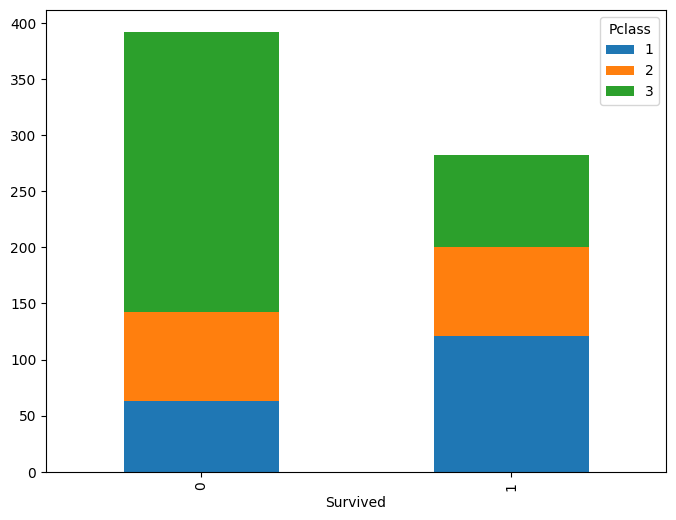

In [60]:
two_way_table1 = pd.crosstab(index=df['Survived'], columns=df['Pclass'])
two_way_table1.plot(kind='bar', stacked=True, figsize=(8, 6))

<Axes: xlabel='Survived'>

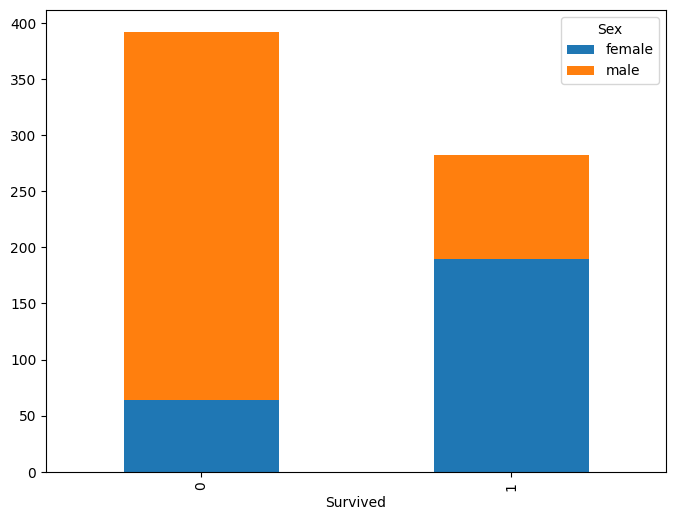

In [61]:
two_way_table2 = pd.crosstab(index=df['Survived'], columns=df['Sex'])
two_way_table2.plot(kind='bar', stacked=True, figsize=(8, 6))

<Axes: >

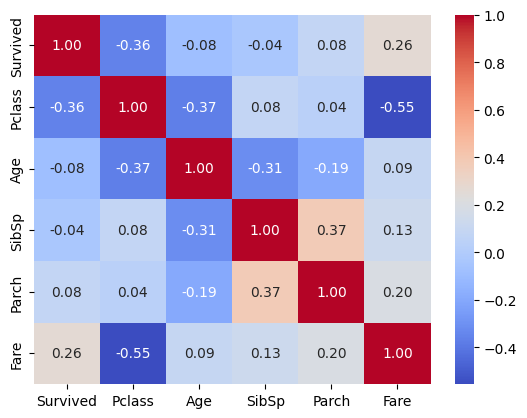

In [66]:
correlation_values = df.drop(["Sex"], axis = 1).corr()
sns.heatmap(correlation_values,
            annot=True,
            cmap='coolwarm',
            fmt=".2f")